# Getting started with Landmark Explanation

Note: you can run **[this notebook live in Google Colab](https://colab.research.google.com/github/softlab-unimore/landmark/blob/master/quick_start_DeepMatcher.ipynb)** and use free GPUs provided by Google.

This tutorial describes how to effortlessly explaining entity matching. Specifically, we will see how to match pairs of tuples (also called data records or table rows) to determine if they refer to the same real world entity. To do so, we will need labeled examples as input, i.e., tuple pairs which have been annotated as matches or non-matches. This will be used to train a model to explain using supervised learning. After that you will apply Landmark to get an explanation of the model over a record from your data. 

In this notebook you will use the [DeepMatcher](https://github.com/anhaidgroup/deepmatcher) library.



## Step 0. Setup

If you are running this notebook inside Colab, you will first need to install necessary packages by running the code below:

In [17]:
!pip install --upgrade --no-cache-dir gdown
!gdown --id 14eQiG9sYM4LcCfJbwnoUgxZ0-PfpsWkQ -O ABT-BUY-data.zip
!unzip ABT-BUY-data.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=14eQiG9sYM4LcCfJbwnoUgxZ0-PfpsWkQ
To: /content/ABT-BUY-data.zip
100% 39.6M/39.6M [00:00<00:00, 46.4MB/s]
Archive:  ABT-BUY-data.zip
replace Abt-Buy/train_simplified.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [18]:
!pip install deepmatcher

In [19]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.zip --directory-prefix=/root/.vector_cache
!unzip /root/.vector_cache/wiki.en.zip -d /root/.vector_cache/
!rm /root/.vector_cache/wiki.en.vec

--2022-03-23 15:04:52--  https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.74.142, 104.22.75.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.74.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10356881291 (9.6G) [application/zip]
Saving to: ‘/root/.vector_cache/wiki.en.zip’

wiki.en.zip         100%[===================>]   9.65G  40.3MB/s    in 4m 11s  

2022-03-23 15:09:03 (39.4 MB/s) - ‘/root/.vector_cache/wiki.en.zip’ saved [10356881291/10356881291]

Archive:  /root/.vector_cache/wiki.en.zip
  inflating: /root/.vector_cache/wiki.en.vec  

  inflating: /root/.vector_cache/wiki.en.bin  


### clone landmark code

In [20]:
!git clone https://github.com/softlab-unimore/landmark.git
!pip install -r landmark/requirements.txt

fatal: destination path 'landmark' already exists and is not an empty directory.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import deepmatcher as dm

### Load data for entity matching

Now let's get some sample data to play with in this tutorial.

In [22]:
dataset_path = '/content/Abt-Buy/'

simplified_columns = ['id','left_id','right_id','label','left_name','right_name']
train_df = pd.read_csv(dataset_path + 'train_merged.csv')[simplified_columns]
valid_df = pd.read_csv(dataset_path + 'valid_merged.csv')[simplified_columns]
test_df = pd.read_csv(dataset_path + 'test_merged.csv')[simplified_columns]

# train_df.to_csv(dataset_path + 'train_simplified.csv', index=False)
# valid_df.to_csv(dataset_path + 'valid_simplified.csv', index=False)
# test_df.to_csv(dataset_path + 'test_simplified.csv', index=False)

exclude_attrs=['id','left_id','right_id', 'label']

In [23]:
train, validation, test = dm.data.process(path=dataset_path,
    train='train_simplified.csv', validation='valid_simplified.csv', test='test_simplified.csv', ignore_columns=exclude_attrs )


In [24]:
model = dm.MatchingModel()

Training takes some minutes...

In [25]:
%%time 
#skip training. I saved the model state for you.
# model.run_train(train, validation, best_save_path=dataset_path+'best_model.pth', epochs=15, pos_neg_ratio=3, batch_size=128)


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10 µs


In [26]:
model.load_state(dataset_path+'best_model.pth')

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1000: UserWarning: Using non-full backward hooks on a Module that does not take as input a single Tensor or a tuple of Tensors is deprecated and will be removed in future versions. This hook will be missing some of the grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using non-full backward hooks on a Module that does not take as input a "
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1025: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


In [27]:
model.run_eval(test)

===>  EVAL Epoch 8


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1000: UserWarning: Using non-full backward hooks on a Module that does not take as input a single Tensor or a tuple of Tensors is deprecated and will be removed in future versions. This hook will be missing some of the grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using non-full backward hooks on a Module that does not take as input a "
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1025: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:990: UserWarning: Using non-full backward

Finished Epoch 8 || Run Time:    1.8 | Load Time:    1.3 || F1:  32.17 | Prec:  30.94 | Rec:  33.50 || Ex/s: 604.29



tensor(32.1678, device='cuda:0')

## Step2. Explanation using Landmark

In [28]:
from landmark import Landmark

In [29]:
# The explainer takes a predict method to analyse its behavior. 
# To this end I prepared for you a wrapper for DeepMatcher.
from IPython.utils import io
import os
#from landmark.wrapper.DMWrapper import DMWrapper

class DMWrapper(object):
    def __init__(self, dm_trained_model, exclude_attrs, one_by_one=False):
        self.dm = dm_trained_model
        self.exclude_attrs = exclude_attrs
        self.one_by_one = one_by_one

    def predict(self, dataset):
        """

        Args:
            dataset: dataset to be predicted wih the same structure of the training dataset

        Returns: list of match scores

        """

        with io.capture_output() as captured:
            self.predictions = []
            file_path = f'/tmp/candidate.csv'
            if self.one_by_one:
                for i in range(dataset.shape[0]):
                    dataset.iloc[[i]].to_csv(file_path, index_label='id')  # /tmp/ path for colab env

                    candidate = dm.data.process_unlabeled(path=file_path, trained_model=self.dm,
                                                          ignore_columns=self.exclude_attrs)
                    self.predictions += [self.dm.run_prediction(candidate)]
                os.remove(file_path)
                res = pd.concat(self.predictions)['match_score'].values
            else:
                dataset.to_csv(file_path, index_label='id')  # /tmp/ path for colab env
                candidate = dm.data.process_unlabeled(path=file_path, trained_model=self.dm,
                                                      ignore_columns=self.exclude_attrs)
                self.predictions = self.dm.run_prediction(candidate)
                os.remove(file_path)
                res = self.predictions['match_score'].values
        return res

dm_wrapped = DMWrapper(model, exclude_attrs=exclude_attrs)

In [30]:
test_df.head()

,id,left_id,right_id,label,left_name,right_name
0,0,445,910,0,sony pink cyber-shot 7.2 megapixel digital cam...,olympus fe-360 digital camera pink 226540
1,1,477,910,0,sony silver cyber-shot digital camera dscw150,olympus fe-360 digital camera pink 226540
2,2,445,415,0,sony pink cyber-shot 7.2 megapixel digital cam...,sony lcs-twa/b cyber-shot camera case lcstwa/b
3,3,483,415,0,sony red cyber-shot digital camera dscw170r,sony lcs-twa/b cyber-shot camera case lcstwa/b
4,4,241,415,0,sony lcs-twa/r red soft leather carrying case ...,sony lcs-twa/b cyber-shot camera case lcstwa/b


In [31]:
explainer = Landmark(dm_wrapped.predict, test_df, exclude_attrs=exclude_attrs, lprefix='left_', rprefix='right_', split_expression=r' ')

In [32]:
%%time 
preds = dm_wrapped.predict(test_df)

CPU times: user 9.28 s, sys: 8.57 s, total: 17.8 s
Wall time: 48.1 s


Select an item to explain.

In [33]:
el = test_df[test_df.id==270]
display(el)

,id,left_id,right_id,label,left_name,right_name
270,270,574,399,0,sony digital slr camera with lens kit dslra200w,nikon digital camera leather case 5811


### Explain a NO-MATCH item with token injection mechanism
Call explain to generate the explanation.

---


By default the **conf** parameter is set to 'auto' it means that the perturbation strategy depends on the label (that must exist in the DataFrame columns). 

*   If label == 1 --> *single* perturbation with landmark.
*   If label == 0 --> *double* perturbation with landmark. (*double* means that we inject tokens from the landmark description into the perturbed description) see the paper for more.

In [34]:
%%time
exp = explainer.explain(el)

CPU times: user 2.08 s, sys: 20.4 ms, total: 2.1 s
Wall time: 2.18 s


In [35]:
exp

,index,id,column,position,word,word_prefix,impact,conf
0,0,270,left_name,6,kit,A06_kit,-0.067759,right_landmark_injection
1,1,270,left_name,9,leather,A09_leather,0.044557,right_landmark_injection
2,2,270,left_name,0,sony,A00_sony,0.042032,right_landmark_injection
3,3,270,left_name,2,slr,A02_slr,-0.022278,right_landmark_injection
4,4,270,left_name,11,5811,A11_5811,0.016719,right_landmark_injection
5,5,270,left_name,1,digital,A01_digital,-0.011932,right_landmark_injection
6,6,270,left_name,4,with,A04_with,0.008387,right_landmark_injection
7,7,270,left_name,5,lens,A05_lens,-0.005534,right_landmark_injection
8,8,270,left_name,8,nikon,A08_nikon,0.004327,right_landmark_injection
9,9,270,left_name,3,camera,A03_camera,-0.002573,right_landmark_injection


,id,left_id,right_id,label,left_name,right_name
270,270,574,399,0,sony digital slr camera with lens kit dslra200w,nikon digital camera leather case 5811


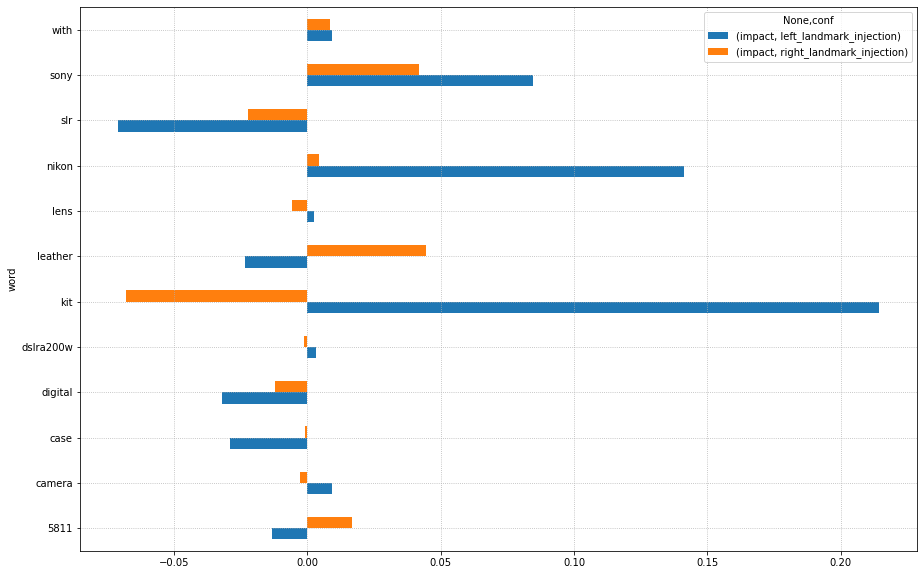

In [36]:
to_plot = exp
figsize = (15,10)
aggregated = to_plot.pivot_table(index='word',values=['impact'],columns=['conf'], aggfunc='max' )
plot = aggregated.plot(kind='barh', figsize=figsize,)
plt.gca().grid(True, linestyle=':', axis='both')
el

/content/landmark/landmark/landmark.py:284: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  view.drop('impact', 1, inplace=True)


,left_name,right_name
270,sony digital slr camera with lens kit dslra200w,nikon digital camera leather case 5811


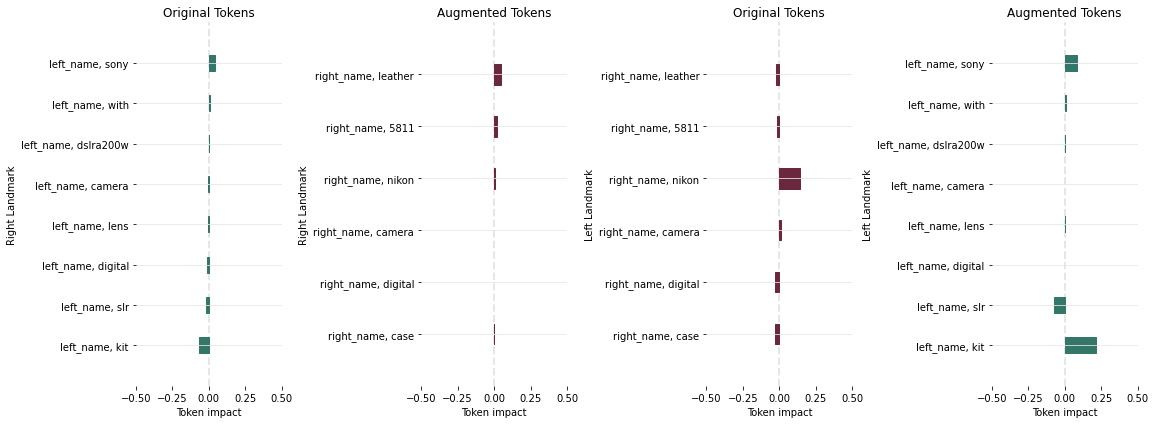

In [37]:
explainer.plot(exp, el)
el[['left_name','right_name']]

In [38]:
explainer.double_explanation_conversion(exp, el)

/content/landmark/landmark/landmark.py:284: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  view.drop('impact', 1, inplace=True)


,column,position,word,score_right_landmark,score_left_landmark
0,left_name,6,kit,-0.067759,0.214290
2,left_name,0,sony,0.042032,0.084581
3,left_name,2,slr,-0.022278,-0.070905
5,left_name,1,digital,-0.011932,0.000000
6,left_name,4,with,0.008387,0.009145
7,left_name,5,lens,-0.005534,0.002742
9,left_name,3,camera,-0.002573,0.000000
10,left_name,7,dslra200w,-0.001187,0.003332
13,right_name,0,nikon,0.004327,0.141151
16,right_name,1,digital,0.000000,-0.031854


### NO-MATCH with 'single' mechanism

In [39]:
exp = explainer.explain(el, conf='single')

/content/landmark/landmark/landmark.py:284: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  view.drop('impact', 1, inplace=True)


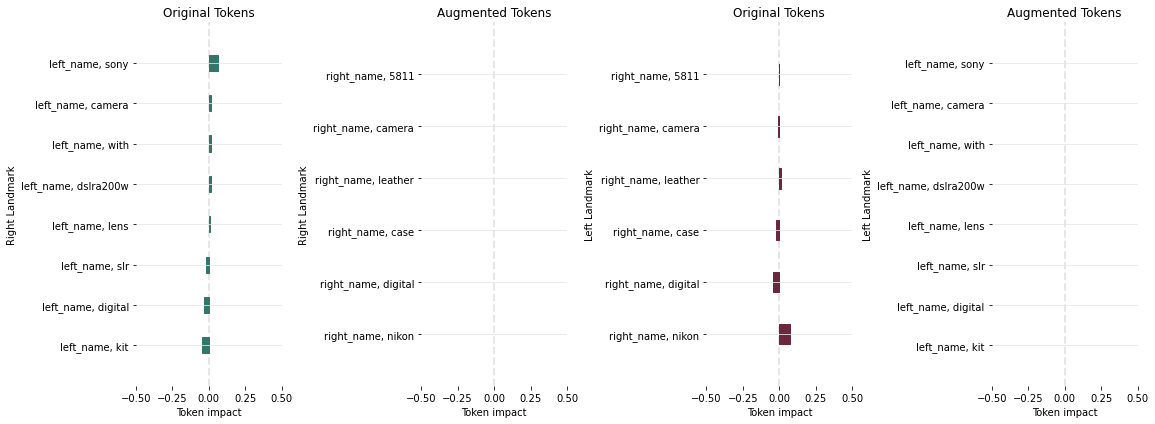

In [40]:
explainer.plot(exp, el) # No augmented (injected) tokens

,id,left_id,right_id,label,left_name,right_name
270,270,574,399,0,sony digital slr camera with lens kit dslra200w,nikon digital camera leather case 5811


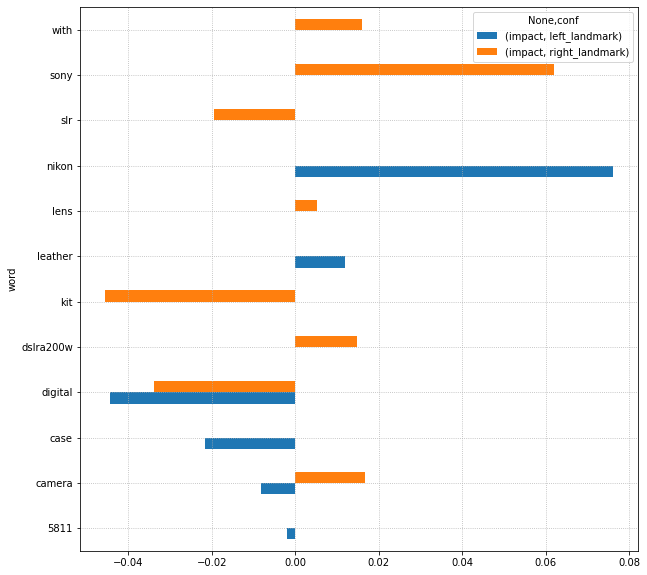

In [41]:
to_plot = exp
figsize = (10,10)
aggregated = to_plot.pivot_table(index='word',values=['impact'],columns=['conf'], aggfunc='max' )
plot = aggregated.plot(kind='barh', figsize=figsize,)
plt.gca().grid(True, linestyle=':', axis='both')
el